## Import libraries and dataset

In [1]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats





In [2]:
# Load dataset and inspect the make sure it loaded correctly
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Scrubbing/Cleaning

In [5]:
#Replace null values
df = df.replace('?' , np.nan)

In [6]:
#For the sake of not having a cluttered plot, converting price to be shown in thousands
df['price1000'] = df['price']/1000

In [7]:
#Capping price at one million due to large data
df_undermill = df.loc[df['price'] < 1000000]
df_undermill.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price1000
count,2.010700e+04,20107.000000,20107.000000,20107.000000,20107.00000,2.010700e+04,20107.000000,17880.000000,20050.000000,20107.000000,20107.000000,20107.000000,20107.000000,16537.000000,20107.000000,20107.000000,20107.000000,20107.000000,20107.000000,20107.000000
mean,4.610144e+09,467124.140747,3.321729,2.038556,1954.36082,1.450438e+04,1.470856,0.002740,0.161347,3.404635,7.503506,1691.747849,1970.756254,72.151962,98078.591684,47.555816,-122.213258,1907.651266,12374.416024,467.124141
std,2.878276e+09,195500.712454,0.906988,0.701973,754.83748,3.998709e+04,0.536165,0.052279,0.617590,0.645281,1.011387,710.961106,29.100778,372.525681,53.312865,0.141725,0.142478,600.406322,26420.957711,195.500712
min,1.000102e+06,78000.000000,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,78.000000
25%,2.140950e+09,314000.000000,3.000000,1.500000,1390.00000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,0.000000,98033.000000,47.457400,-122.330000,1460.000000,5040.000000,314.000000
50%,3.905120e+09,433200.000000,3.000000,2.000000,1840.00000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1509.000000,1974.000000,0.000000,98065.000000,47.565600,-122.233000,1790.000000,7529.000000,433.200000
75%,7.340601e+09,592225.000000,4.000000,2.500000,2410.00000,1.025000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2080.000000,1996.000000,0.000000,98118.000000,47.680100,-122.122000,2260.000000,9830.500000,592.225000
max,9.900000e+09,999999.000000,33.000000,7.500000,7480.00000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000,999.999000


In [8]:
#Variables to compare homes under a million against
dfX= df_undermill[['sqft_living', 'bathrooms', 'floors', 'grade'
              , 'sqft_living15', 'yr_built', 'zipcode', 'view']]
dfY= df_undermill['price1000']

In [9]:
#Creating dummy variables
dfXDummy1 = pd.get_dummies(dfX, columns=['view','zipcode'])
dfXDummy1 = dfXDummy1.drop(['view_0.0','zipcode_98001'], axis=1)
dfXDummy1.head()

,sqft_living,bathrooms,floors,grade,sqft_living15,yr_built,view_1.0,view_2.0,view_3.0,view_4.0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,1.00,1.0,7,1340,1955,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570,2.25,2.0,7,1690,1951,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770,1.00,1.0,6,2720,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,3.00,1.0,7,1360,1965,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,2.00,1.0,8,1800,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
xdum= dfXDummy1[['sqft_living', 'bathrooms', 'floors', 'grade', 
              'sqft_living15', 'yr_built']]
ydum= dfY

## Exploring

Text(0, 0.5, 'Frequency')

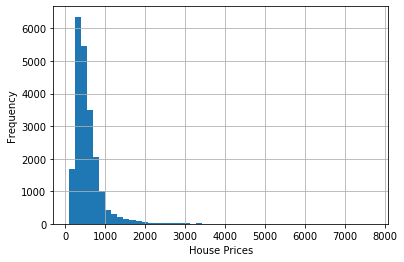

In [11]:
#Checking price distribution
df['price1000'].hist(bins=50)
plt.xlabel("House Prices")
plt.ylabel("Frequency")

In [12]:
#From above clearly price is not normally distributed
#Perform log transformation to normally distribute the target variable
df['log_price1000'] = df['price1000'].apply(lambda x: np.log(x))


Text(0, 0.5, 'Frequency')

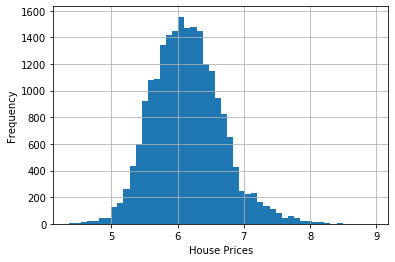

In [13]:
#Price normally distributed
df['log_price1000'].hist(bins=50)
plt.xlabel("House Prices")
plt.ylabel("Frequency")

In [14]:
df= df.drop(['sqft_lot', 'id', 'waterfront', 'condition', 'sqft_above', 
                           'yr_renovated', 'zipcode', 'lat', 'long', 
                          'sqft_lot15', 'price1000', 'price'], axis=1)

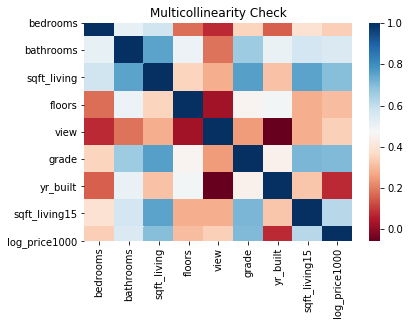

In [15]:
#Check for multicollinerity
color_map = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Multicollinearity Check')
_ = sns.heatmap(df.corr(), cmap="RdBu")

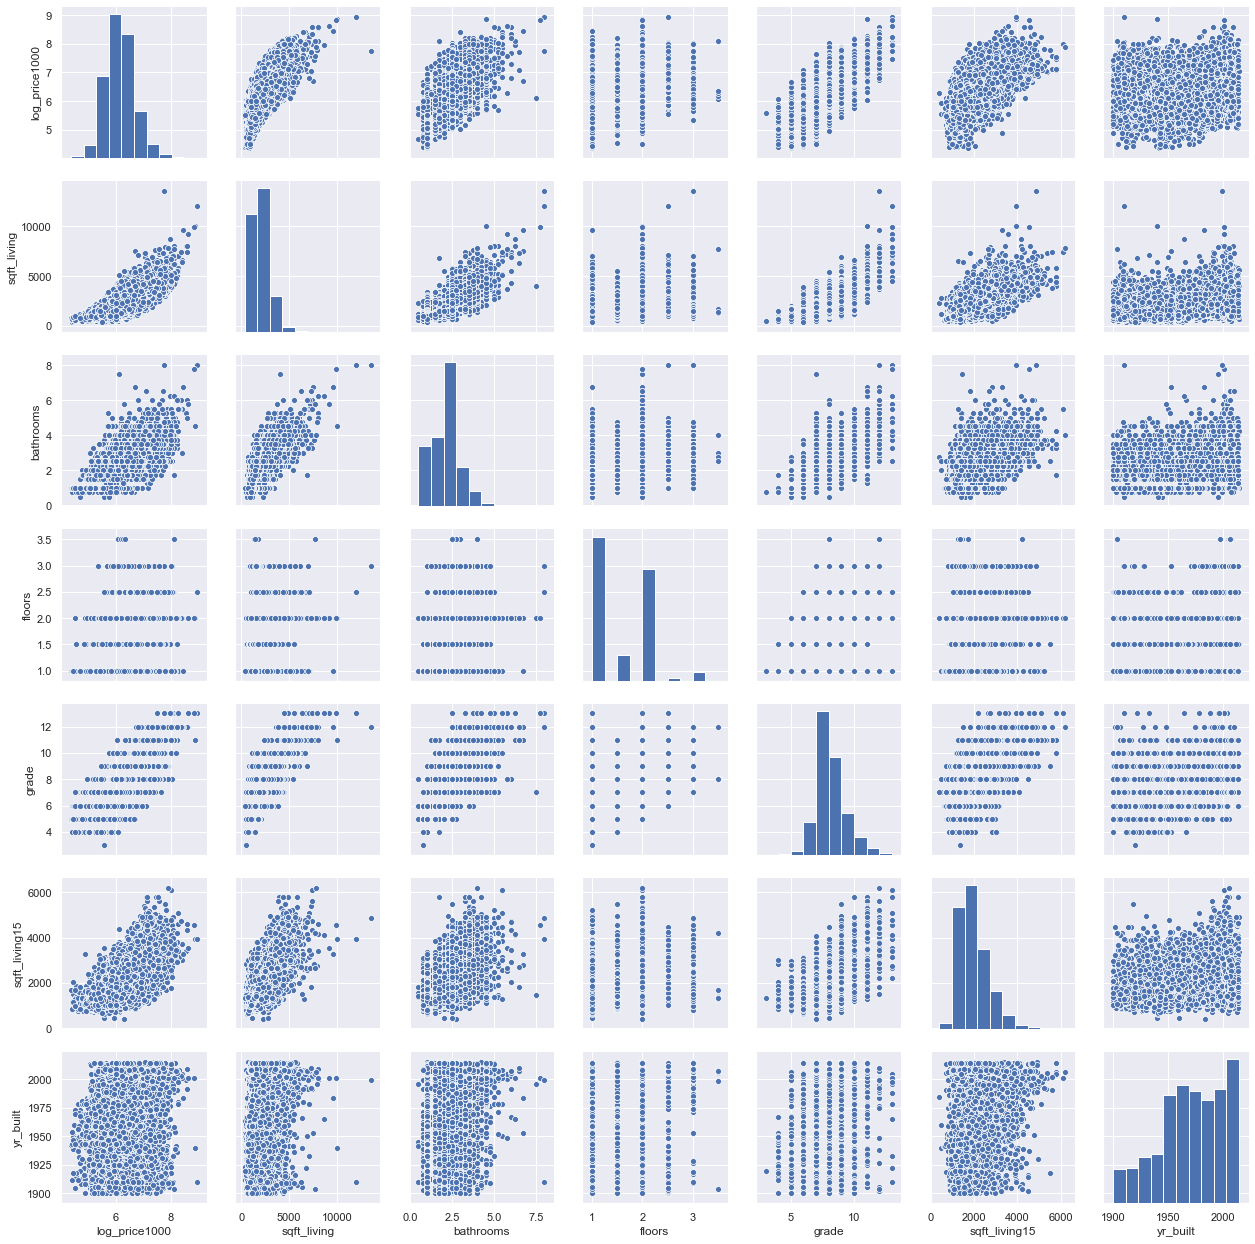

In [16]:
sns.set()
cols = ['log_price1000','sqft_living', 'bathrooms', 'floors', 'grade', 
              'sqft_living15', 'yr_built']
sns.pairplot(df[cols], height = 2.5)
plt.show();

Text(0.5, 1.0, 'Number of bedrooms in homes sold')

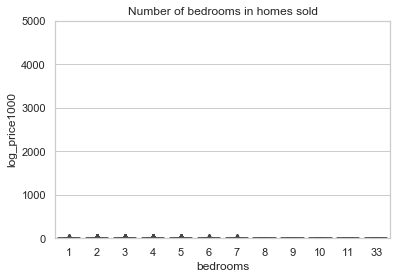

In [17]:
sns.set(style="whitegrid")
sns.boxplot(x=df["bedrooms"],y=df["log_price1000"])
plt.ylim(0, 5000)
plt.title("Number of bedrooms in homes sold")

In [18]:
plt.figure(figsize=(8,10))
sns.scatterplot(xdum='long', ydum='lat', hue='price', data=df, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

ValueError: A wide-form input must have only numeric values.

<Figure size 576x720 with 0 Axes>

## Regression Model

In [ ]:
#logprice1000 is the dependent variable
#xdum = sm.add_constant(xdum)
#model=sm.OLS(ydum, xdum).fit()
#model.summary()

Note: Our Model ran with all explanatory variables in the X dataframe, and the target variable (House price in thousands of dollars) in the Y dataframe. All explanatory variables are significant. *reword*

In [ ]:
outcome = 'log_price1000'
x_cols = ['log_price1000','sqft_living', 'bathrooms', 'floors', 'grade', 
              'sqft_living15', 'yr_built']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

In [ ]:
#Q-Q Plot to test for normal distribution
residuals = model.resid
fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

In [ ]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

In [ ]:
#Train and test
xdum_train, xdum_test, ydum_train, ydum_test = train_test_split(xdum, ydum, test_size=0.2)

lm = LinearRegression()
model = lm.fit(xdum_train, dum_train)
predictions = lm.predict(xdum_test)

lm.score(xdum_train, ydum_train)